In [7]:
#Decouverte des données
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
files=[file for file in os.listdir(r'C:\Users\pc\OneDrive\Belgeler\data-sales-main')]

In [9]:
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [10]:
path=r'C:\Users\pc\OneDrive\Belgeler\data-sales-main'
all_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [11]:
donnee_janvier=pd.read_csv(path+'/Sales_January_2019.csv')
donnee_janvier.shape

(9723, 6)

In [12]:
all_data.to_csv(path+'/all_data.csv',index=False)

In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### all_data.head(10)

In [16]:
all_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [17]:
all_data=all_data.dropna(how='all')

In [18]:
all_data.shape

(372610, 6)

In [19]:
def month(x):
    return x.split('/')[0]


In [20]:
all_data['Month'] = all_data['Order Date'].apply(month)


In [21]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [26]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [28]:
print(all_data['Month'].unique())


['04' '05' 'Order Date' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [29]:
all_data = all_data[all_data['Month'] != 'Order Date']


In [30]:
all_data['Month'] = all_data['Month'].astype(int)


In [31]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)


In [32]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [34]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [35]:
all_data.groupby('Month')['Sales'].sum()

Month
1     3644513.46
2     4404044.84
3     5614200.76
4     6781340.48
5     6305213.50
6     5155604.52
7     5295551.52
8     4488935.76
9     4195120.26
10    7473453.76
11    6399206.40
12    9226886.68
Name: Sales, dtype: float64

In [38]:
sales_by_month = all_data.groupby('Month')['Sales'].sum()


In [ ]:
#le nombre de ventre par mois :::::

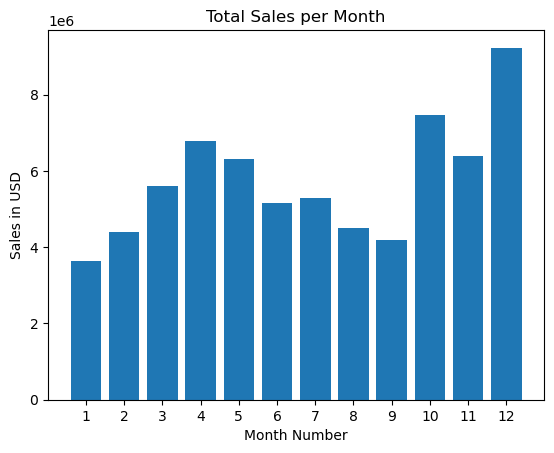

In [39]:

months = range(1, 13)
plt.bar(months, sales_by_month)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.title('Total Sales per Month')
plt.show()


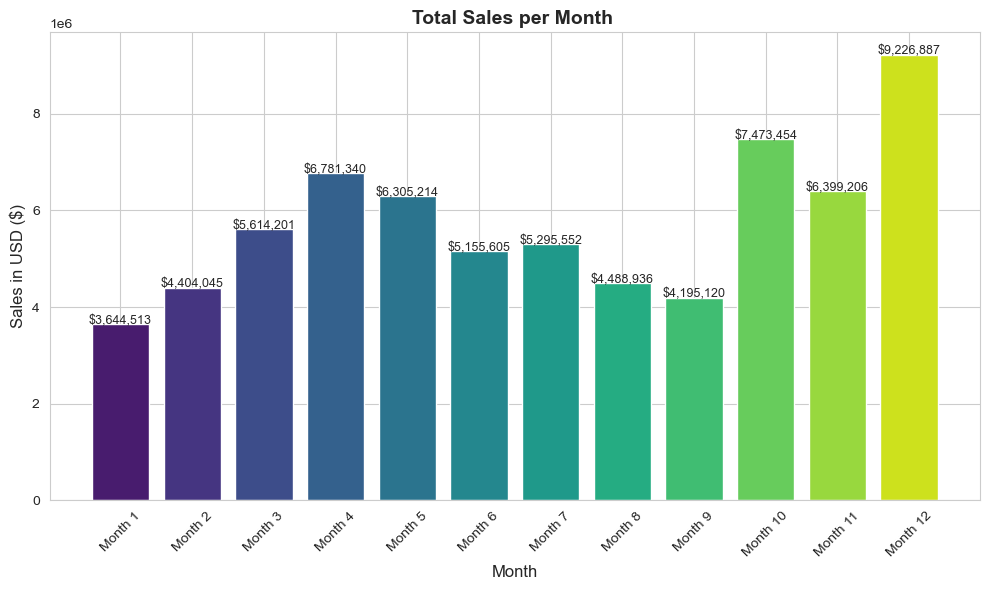

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

colors = sns.color_palette("viridis", 12)  

months = range(1, 13)
plt.bar(months, sales_by_month, color=colors)

plt.xticks(months, [f'Month {m}' for m in months], rotation=45, fontsize=10)
plt.ylabel('Sales in USD ($)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Total Sales per Month ', fontsize=14, weight='bold')

for i, val in enumerate(sales_by_month):
    plt.text(i + 1, val + 1_000, f"${val:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()
